In [6]:
#import librarires
import keras
from keras.applications import inception_v3 as inc_net
from keras.applications.imagenet_utils import decode_predictions
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
import lime
from lime import lime_image


import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.applications import VGG19
from keras import layers
from keras.preprocessing import image
import seaborn as sns
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('E:\COVID19'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [8]:
train_data = defect_tree = tf.keras.preprocessing.image_dataset_from_directory(
    '../input/covid19-radiography-database/COVID-19 Radiography Database',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '../input/covid19-radiography-database/COVID-19 Radiography Database',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)
class_names =  ["COVID-19","NORMAL","Viral Pneumonia"]

Found 3829 files belonging to 3 classes.
Using 3064 files for training.
Found 3829 files belonging to 3 classes.
Using 765 files for validation.


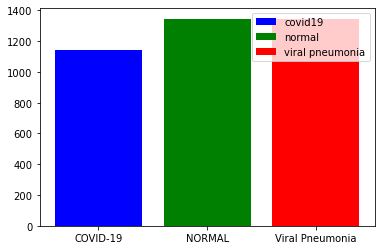

In [9]:
#visulaize data
fig, ax = plt.subplots()
ax.bar("COVID-19",1143,color="b",label="covid19")
ax.bar("NORMAL",1341,color="g",label="normal")
ax.bar("Viral Pneumonia",1345,color="r",label="viral pneumonia")
ax.legend()

In [10]:
# model = tf.keras.models.Sequential([
#   layers.BatchNormalization(),
#   layers.Conv2D(32, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(3, activation= 'softmax')
# ])
# Create CNN model
# Will use a combination of convolutional, max pooling, and dropout layers for this purpose
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
          
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
          
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))
model.add(Dropout(0.2))

# add in fully connected dense layers to model, then output classifiction probabilities using a softmax activation function
model.add(Flatten())
model.add(Dense(3000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'softmax'))


In [11]:
#to avoid overfitting
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
## fit model
history=model.fit(train_data,validation_data= test_data,batch_size=128,epochs = 3,callbacks=[early])

Epoch 1/3
96/96 [==============================] - ETA: 0s - loss: 10.1012 - accuracy: 0.281 - ETA: 38s - loss: 238.2131 - accuracy: 0.281 - ETA: 49s - loss: 188.3079 - accuracy: 0.281 - ETA: 52s - loss: 161.6680 - accuracy: 0.312 - ETA: 55s - loss: 136.1779 - accuracy: 0.318 - ETA: 56s - loss: 114.8088 - accuracy: 0.328 - ETA: 56s - loss: 99.0445 - accuracy: 0.348 - ETA: 58s - loss: 87.0031 - accuracy: 0.34 - ETA: 58s - loss: 77.5869 - accuracy: 0.33 - ETA: 57s - loss: 69.9902 - accuracy: 0.33 - ETA: 58s - loss: 63.7357 - accuracy: 0.34 - ETA: 57s - loss: 58.5258 - accuracy: 0.33 - ETA: 56s - loss: 54.1142 - accuracy: 0.32 - ETA: 55s - loss: 50.3306 - accuracy: 0.32 - ETA: 54s - loss: 47.0502 - accuracy: 0.32 - ETA: 54s - loss: 44.1792 - accuracy: 0.31 - ETA: 53s - loss: 41.6452 - accuracy: 0.31 - ETA: 53s - loss: 39.3919 - accuracy: 0.32 - ETA: 52s - loss: 37.3773 - accuracy: 0.31 - ETA: 51s - loss: 35.5623 - accuracy: 0.32 - ETA: 50s - loss: 33.9210 - accuracy: 0.32 - ETA: 50s - los

96/96 [==============================] - ETA: 0s - loss: 0.8736 - accuracy: 0.75 - ETA: 19s - loss: 0.7863 - accuracy: 0.734 - ETA: 24s - loss: 0.7071 - accuracy: 0.729 - ETA: 27s - loss: 0.6197 - accuracy: 0.773 - ETA: 31s - loss: 0.6563 - accuracy: 0.743 - ETA: 33s - loss: 0.7114 - accuracy: 0.708 - ETA: 33s - loss: 0.7511 - accuracy: 0.683 - ETA: 34s - loss: 0.7281 - accuracy: 0.695 - ETA: 34s - loss: 0.7525 - accuracy: 0.677 - ETA: 33s - loss: 0.7283 - accuracy: 0.700 - ETA: 35s - loss: 0.7216 - accuracy: 0.704 - ETA: 35s - loss: 0.7277 - accuracy: 0.697 - ETA: 34s - loss: 0.7233 - accuracy: 0.701 - ETA: 34s - loss: 0.7134 - accuracy: 0.707 - ETA: 33s - loss: 0.7105 - accuracy: 0.710 - ETA: 32s - loss: 0.7080 - accuracy: 0.709 - ETA: 32s - loss: 0.6963 - accuracy: 0.711 - ETA: 32s - loss: 0.6795 - accuracy: 0.713 - ETA: 31s - loss: 0.6868 - accuracy: 0.707 - ETA: 31s - loss: 0.6838 - accuracy: 0.710 - ETA: 30s - loss: 0.6815 - accuracy: 0.706 - ETA: 30s - loss: 0.6875 - accuracy: 0

In [14]:
model.evaluate(test_data)

24/24 [==============================] - ETA: 0s - loss: 0.3893 - accuracy: 0.87 - ETA: 4s - loss: 0.3360 - accuracy: 0.90 - ETA: 5s - loss: 0.3775 - accuracy: 0.86 - ETA: 5s - loss: 0.4184 - accuracy: 0.84 - ETA: 5s - loss: 0.4096 - accuracy: 0.85 - ETA: 5s - loss: 0.4150 - accuracy: 0.85 - ETA: 5s - loss: 0.4115 - accuracy: 0.85 - ETA: 5s - loss: 0.4198 - accuracy: 0.85 - ETA: 5s - loss: 0.4289 - accuracy: 0.85 - ETA: 4s - loss: 0.4457 - accuracy: 0.84 - ETA: 4s - loss: 0.4532 - accuracy: 0.84 - ETA: 4s - loss: 0.4397 - accuracy: 0.85 - ETA: 3s - loss: 0.4286 - accuracy: 0.85 - ETA: 3s - loss: 0.4349 - accuracy: 0.85 - ETA: 3s - loss: 0.4359 - accuracy: 0.85 - ETA: 2s - loss: 0.4293 - accuracy: 0.85 - ETA: 1s - loss: 0.4323 - accuracy: 0.85 - ETA: 0s - loss: 0.4350 - accuracy: 0.85 - 6s 236ms/step - loss: 0.4350 - accuracy: 0.8536


[0.43495333194732666, 0.8535947799682617]

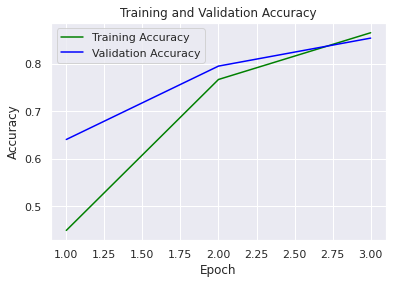

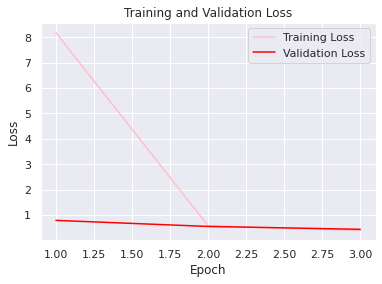

In [15]:
#plotting training values
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

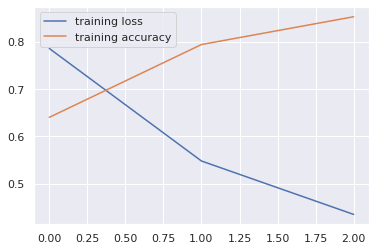

In [16]:
#train data accuracy and loss
plt.plot(history.history['val_loss'], label = 'training loss')
plt.plot(history.history['val_accuracy'], label = 'training accuracy')
plt.legend()

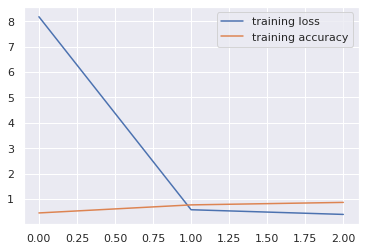

In [17]:
#test data accuracy and loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

[0]
COVID-19


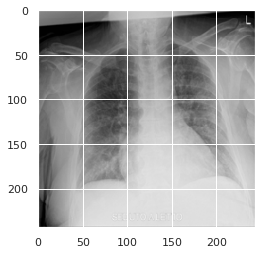

In [19]:
#example 1
image_path = "../input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19/COVID-19 (3).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=-1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
NORMAL


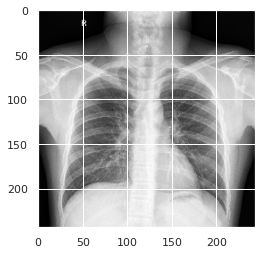

In [21]:
#example 2
image_path = "../input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (1002).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=-1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
NORMAL


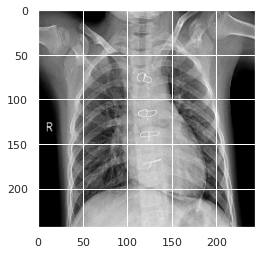

In [22]:
#example 3
image_path = "../input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1002).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=-1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [24]:
#save file as h5 model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5

model.save("model.h5")

# **LIME**

In [37]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(244, 244))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [31]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
explainer = lime_image.LimeImageExplainer()

In [46]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)


CPU times: user 9.01 s, sys: 207 ms, total: 9.22 s
Wall time: 9.14 s


In [42]:
from skimage.segmentation import mark_boundaries

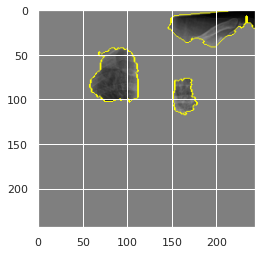

In [43]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

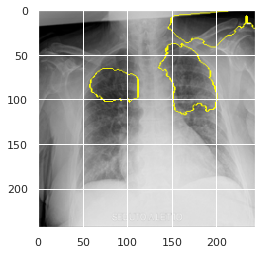

In [47]:
from skimage.segmentation import mark_boundaries
from lime import lime_image
image_path = "../input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19/COVID-19 (3).png"
images = transform_img_fn([image_path])
explainer = lime_image.LimeImageExplainer()
# %%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [48]:
validation_path_covid = '../input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19'
validation_path_viral_pneumonia = '../input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia'
validation_path_normal = '../input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL'

In [50]:
image_paths = []
for _, _, files in os.walk(validation_path_covid):
    for file in files:
        image_paths.append(os.path.join(validation_path_covid, file))

images = transform_img_fn(image_paths[:40])

In [ ]:
explanations = []
for image in images:
    explanations.append(explainer.explain_instance(image, model.predict))

In [ ]:
model.predict(images)

In [ ]:
from skimage.segmentation import mark_boundaries

plt.figure(1, plt.figure(figsize=(100,100)))
index = 0
for explanation in explanations:
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=2, hide_rest=False)
    plt.subplot(20, 20, 1 + index)
    plt.imshow(mark_boundaries(temp, mask))
    index = index + 1
plt.show()